In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import time
import statistics
import numpy as np
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression
from fitter import Fitter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
tic = time.time()

driver_ids = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/driver_ids_(3).csv')
driver_ids

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26 00:00:00
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 00:00:00
934,fff482c704d36a1afe8b8978d5486283,2016-04-08 00:00:00
935,fffecccc49436c5389075b13209f0dfa,2016-05-06 00:00:00


In [3]:
# dfi.export(driver_ids, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/driver_ids.png', max_rows=10)

In [4]:
driver_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   driver_id            937 non-null    object
 1   driver_onboard_date  937 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [5]:
ride_ids = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_ids.csv')
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0


In [6]:
# dfi.export(ride_ids, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_ids_ori.png', max_rows=10)

In [7]:
ride_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [8]:
ride_ts = pd.read_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_timestamps_(3).csv')
ride_ts

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05
...,...,...,...
970400,ffffccd77f47a3de26dfed9a851464b4,requested_at,2016-05-18 08:44:13
970401,ffffccd77f47a3de26dfed9a851464b4,accepted_at,2016-05-18 08:44:21
970402,ffffccd77f47a3de26dfed9a851464b4,arrived_at,2016-05-18 08:44:36
970403,ffffccd77f47a3de26dfed9a851464b4,picked_up_at,2016-05-18 08:44:42


In [9]:
# dfi.export(ride_ts, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_ts.png', max_rows=10)

In [10]:
ride_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ride_id    970405 non-null  object
 1   event      970405 non-null  object
 2   timestamp  970404 non-null  object
dtypes: object(3)
memory usage: 22.2+ MB


In [11]:
ride_ts[ride_ts['timestamp'].isnull()]

,ride_id,event,timestamp
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaN


In [12]:
ride_ts[ride_ts['ride_id'] == '72f0fa0bd86800e9da5c4dced32c8735']

,ride_id,event,timestamp
434220,72f0fa0bd86800e9da5c4dced32c8735,requested_at,2016-04-20 11:56:50
434221,72f0fa0bd86800e9da5c4dced32c8735,accepted_at,2016-04-20 11:57:20
434222,72f0fa0bd86800e9da5c4dced32c8735,arrived_at,NaN
434223,72f0fa0bd86800e9da5c4dced32c8735,picked_up_at,2016-04-20 12:02:20
434224,72f0fa0bd86800e9da5c4dced32c8735,dropped_off_at,2016-04-20 12:16:30


In [13]:
# ride_ts['ride_id'] = ride_ts['ride_id'].astype(str)
# ride_ts['event'] = ride_ts['event'].astype(str)
# ride_ts.info()

In [14]:
ride_ts['timestamp'] = pd.to_datetime(ride_ts['timestamp'])
ride_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ride_id    970405 non-null  object        
 1   event      970405 non-null  object        
 2   timestamp  970404 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 22.2+ MB


In [15]:
# test case
ride_ts[(ride_ts['ride_id'] == '00003037a262d9ee40e61b5c0718f7f0') & (ride_ts['event'] == 'picked_up_at')][['event', 'timestamp']].values[0]

array(['picked_up_at', Timestamp('2016-06-13 09:44:33')], dtype=object)

In [16]:
# check whether the driver_ids are the same in driver_ids and ride_ids
res = ride_ids['driver_id'].unique() == driver_ids['driver_id']
ride = list(ride_ids['driver_id'].unique())
driver = list(driver_ids['driver_id'].unique())
ride.sort()
driver.sort()
ride == driver
len(ride) == len(driver)
cnt = 0
for i in range(len(ride)):
    if ride[i] != driver[i]:
        cnt += 1
#         print(ride[i], driver[i])
cnt

873

In [17]:
len(driver)

937

In [18]:
common1 = set(ride).intersection(set(driver))
len(common1)

854

In [19]:
# check again
cnt = 0
lst1 = []
lst2 = []
for i in ride:
    if i not in driver:
        cnt += 1
        lst1.append(i)
cnt # 83

cnt1 = 0
for i in driver:
    if i not in ride:
        cnt1 += 1
        lst2.append(i)
cnt1 # 83

# lst1.sort()
# lst2.sort()
# for i in range(len(lst1)):
#     if lst1[i] == lst2[i]:
#         print(lst1[i]) # none
# there is 83 values are different in ride_ts and ride_ids

83

In [20]:
# check whether the ride_id are the same in ride_ids and ride_ts data set
ids = list(ride_ids['ride_id'].unique())
ts = list(ride_ts['ride_id'].unique())
common = set(ids).intersection(ts)
len(common)

184819

In [21]:
len(ids)

193502

In [22]:
len(ts)

194081

In [23]:
ts_ride_id = ride_ts['ride_id'].unique()
len(ts_ride_id)

194081

In [24]:
ts_ride_id = ride_ts.groupby('ride_id').max()
ts_ride_id = ts_ride_id.reset_index()
ts_ride_id

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 10:03:05
1,00005eae40882760d675da5effb89ae3,requested_at,2016-05-14 05:34:17
2,000061d42cf29f73b591041d9a1b2973,requested_at,2016-05-16 15:54:18
3,00006efeb0d5e3ccad7d921ddeee9900,requested_at,2016-05-11 19:40:47
4,0000d9b24d8ccdd991b76258e616fa01,requested_at,2016-04-26 18:24:14
...,...,...,...
194076,fffebb46effb90ce758fdff68b569355,requested_at,2016-06-16 10:15:08
194077,ffff9c38173ddfa17bdd115c463e329f,requested_at,2016-06-03 18:50:08
194078,ffff9e431f7fade54b2550ac19ab6e64,requested_at,2016-06-12 04:15:42
194079,ffffa07f48f2f885f714765d794ad596,requested_at,2016-04-19 01:30:48


In [25]:
ride_ids_v2 = ride_ids.copy()
ride_ids_v2 = ride_ids_v2.merge(ts_ride_id, on='ride_id', how='left')
ride_ids_v2

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45
...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04


# Active Drivers over time (weekly basis)

In [26]:
# Active Drivers over time (weekly basis)
weeks = [g for n, g in ride_ids_v2.groupby(pd.Grouper(key='timestamp', freq='W'))]
length = len(weeks) # 14
for i in range(length):
    vars()['week_' + str(i + 1)] = pd.DataFrame(weeks[i]).reset_index()
active_drivers = []
for i in range(length):
    active_drivers.append(len(vars()['week_'+str(i + 1)]['driver_id'].unique()))
active_drivers

[127, 261, 355, 454, 528, 617, 669, 629, 604, 594, 565, 533, 517, 13]

In [27]:
time_range = []
for i in range(length):
    curr = vars()['week_' + str(i + 1)]
    time_range.append(str(curr['timestamp'].dt.date.min()) + ' to ' + str(curr['timestamp'].dt.date.max()))
# len(time_range)
time_range

['2016-03-28 to 2016-04-03',
 '2016-04-04 to 2016-04-10',
 '2016-04-11 to 2016-04-17',
 '2016-04-18 to 2016-04-24',
 '2016-04-25 to 2016-05-01',
 '2016-05-02 to 2016-05-08',
 '2016-05-09 to 2016-05-15',
 '2016-05-16 to 2016-05-22',
 '2016-05-23 to 2016-05-29',
 '2016-05-30 to 2016-06-05',
 '2016-06-06 to 2016-06-12',
 '2016-06-13 to 2016-06-19',
 '2016-06-20 to 2016-06-26',
 '2016-06-27 to 2016-06-27']

In [28]:
tr = pd.DataFrame({'date range': time_range, 'active drivers': active_drivers})
tr

,date range,active drivers
0,2016-03-28 to 2016-04-03,127
1,2016-04-04 to 2016-04-10,261
2,2016-04-11 to 2016-04-17,355
3,2016-04-18 to 2016-04-24,454
4,2016-04-25 to 2016-05-01,528
5,2016-05-02 to 2016-05-08,617
6,2016-05-09 to 2016-05-15,669
7,2016-05-16 to 2016-05-22,629
8,2016-05-23 to 2016-05-29,604
9,2016-05-30 to 2016-06-05,594


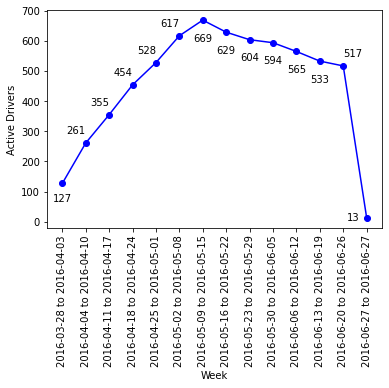

In [29]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

plt.plot('date range', 'active drivers','b-o', data = tr)
plt.xlabel('Week')
plt.ylabel('Active Drivers')
plt.xticks(rotation=90)

for i, v in enumerate(tr['active drivers']):
    if i == 0:
        plt.text(i, v - 60, "%d" %v, ha="center")
    elif i <= 5:
        plt.text(i, v + 30, "%d" %v, ha="right")
    elif i <= 11:
        plt.text(i, v - 70, "%d" %v, ha="center")
    elif i == 12:
        plt.text(i, v + 30, "%d" %v, ha="left")
    else:
        plt.text(v - 0.3, i, "%d" %v, horizontalalignment="right", verticalalignment='center')
# plt.show()
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/date_range.png', bbox_inches='tight')

In [30]:
# ride_ids_v2[ride_ids_v2['driver_id'] == 'ff45a18cae7bed6538847cb36e2a3975']
# ride_ts[ride_ts['ride_id'] == '00ece2c9214008915c5217b4ad53eb7b']

In [31]:
# # try to match the ts data to ride_ids data

# # check how many ride_id is match between ride_ids and ride_ts
# ids = ride_ids['ride_id'].unique()
# ts = ride_ts['ride_id'].unique()
# len(ids) # 193502
# len(ts) # 194081

# # # check how many ride_id in ts is in ids
# # cnt = 0
# # for i in ride_ts['ride_id']:
# #     if i in ride_ids['ride_id']:
# #         cnt += 1
# # cnt # 0

# # try to calculate the duration between timestamp and match it with duration in ids file's data
# # uni = ride_ts['ride_id'].unique()
# # length = len(uni)
# # result = []
# # for i in range(length):
# #     cur = uni[i]
# #     drop = ride_ts[(ride_ts['ride_id'] == cur) & (ride_ts['event'] == 'dropped_off_at')]['timestamp'].values[0]
# #     pick = ride_ts[(ride_ts['ride_id'] == cur) & (ride_ts['event'] == 'picked_up_at')]['timestamp'].values[0]
# #     print((drop - pick)/1000000000)
# #     result.append((drop - pick)/1000000000)

# # above is too slow, try a faster way
# pick = ride_ts[ride_ts['event'] == 'picked_up_at'][['ride_id', 'timestamp']].copy().reset_index().drop(columns='index').rename(columns = {'timestamp':'picktime'})
# drop = ride_ts[ride_ts['event'] == 'dropped_off_at'][['ride_id', 'timestamp']].copy().reset_index().drop(columns='index').rename(columns={'timestamp':'droptime'})
# # new_datetime = pd.DataFrame({'pick': pick, 'drop': drop})
# # new_datetime
# # new_datetime = pd.concat([pick, drop], axis=1)
# new_datetime = pick.merge(drop, on='ride_id', how='left')
# new_datetime['result'] = new_datetime['droptime'] - new_datetime['picktime']
# new_datetime['result'] = new_datetime['result'].dt.total_seconds().astype(int)
# new_datetime
# # result = new_datetime['droptime'] - new_datetime['picktime']
# # result.dt.total_seconds().astype(int)

In [32]:
# ride_ts_v2 = ride_ts.copy()
# ride_ts_v2['timestamp'] = ride_ts_v2['timestamp'].dt.date
# ride_ts_v2['timestamp'] = pd.to_datetime(ride_ts_v2['timestamp'])
# ride_ts_v2.drop_duplicates(subset='ride_id', inplace=True)
# merge = new_datetime[['ride_id', 'result']].copy()
# ride_ts_v2 = ride_ts_v2.merge(merge, on='ride_id', how='left')
# ride_ts_v2

In [33]:
# check whether the result column match some of the duration in ride_ids data set
# result = list(ride_ts_v2['result'])
# ids = list(ride_ids['ride_duration'])
# cnt = 0
# for i in range(len(result)):
#     if result[i] in ids:
#         cnt += 1
# cnt # 194034 

# len(set(result)) # 4113
# len(set(ids)) # 4092
## becasue there are many duplications in result and ids, so the compare is not exact right

# ride_ts_v2.rename(columns={'result':'ride_duration'}, inplace=True)
# ride_ids_v2 = ride_ids.copy()
# merged = ride_ids_v2.merge(ride_ts_v2, on='ride_duration', how='left')
# merged

In [34]:
# # test case
# zero = ride_ts['timestamp'].iloc[0]
# four = ride_ts['timestamp'].iloc[4]
# res = four - zero
# res.seconds

In [35]:
# the ride_id in ride_ts and ride_ids are different thing
test = ride_ids['ride_id'].unique()
test[0] in ride_ts['ride_id']
ids = list(ride_ids['ride_id'].unique())
ts = list(ride_ts['ride_id'].unique())
ids.sort()
ts.sort()
ids == ts

False

In [36]:
# # test case
# a = [1, 2, 3, 4, 5, 6]
# b = [6, 5, 4, 3, 1, 2]
# a.sort() == b.sort()

In [37]:
# check whether a driver's rides are less than 4
res = ride_ids.groupby('driver_id').count()
rides = res['ride_id'] < 4
rides = rides.reset_index()
cnt = 0
for i in range(len(rides['ride_id'])):
    if rides['ride_id'].iloc[i] == True:
        cnt += 1
        print(rides['driver_id'].iloc[i], i)
# res.iloc[475: 495]
print("The percentage of active driver is: {0:.2f}%".format((937-cnt)/937*100))

7b625f643d0775f0ac4898e33235377b 475
7ff85c5c0e9324e28d1e0d0589c364bd 494
The percentage of active driver is: 99.79%


In [38]:
# there are 14 weeks in ride_timestamp dataframe
weeks = [g for n, g in ride_ts.groupby(pd.Grouper(key='timestamp',freq='W'))]
len(weeks)
# weeks

14

In [39]:
# test case
pd.DataFrame(weeks[0]).reset_index()

,index,ride_id,event,timestamp
0,383080,655ccbeb2a62880159e20e986c1cdaeb,requested_at,2016-03-28 05:48:18
1,383081,655ccbeb2a62880159e20e986c1cdaeb,accepted_at,2016-03-28 05:48:23
2,383082,655ccbeb2a62880159e20e986c1cdaeb,arrived_at,2016-03-28 06:02:36
3,383083,655ccbeb2a62880159e20e986c1cdaeb,picked_up_at,2016-03-28 06:02:39
4,383084,655ccbeb2a62880159e20e986c1cdaeb,dropped_off_at,2016-03-28 06:37:51
...,...,...,...,...
12831,40806,0ac96c68fe3ba2002c8ffba6ccaf491c,accepted_at,2016-04-03 23:52:51
12832,40807,0ac96c68fe3ba2002c8ffba6ccaf491c,arrived_at,2016-04-03 23:58:18
12833,40808,0ac96c68fe3ba2002c8ffba6ccaf491c,picked_up_at,2016-04-03 23:58:20
12834,318455,53eb22d4e7a08e476168fb9002088f17,requested_at,2016-04-03 23:58:44


In [40]:
# transfer list weeks to dataframe
for i in range(len(weeks)):
    vars()['week' + str(i + 1)] = pd.DataFrame(weeks[i]).reset_index()

In [41]:
week1['ride_id'].unique()

array(['655ccbeb2a62880159e20e986c1cdaeb',
       'e81c8bdc2a6a9056ba49bf67bf97c311',
       'd113a5d0e13f2ddd041806aa5b1d90c8', ...,
       'c0d7fe5b6fa5bbcac0747c496ed48dd1',
       '0ac96c68fe3ba2002c8ffba6ccaf491c',
       '53eb22d4e7a08e476168fb9002088f17'], dtype=object)

# Number of Rides over time (weekly basis)

In [42]:
num = [] # Number of Rides over time (weekly basis)
for i in range(len(weeks)):
    num.append(len(vars()['week'+str(i + 1)]['ride_id'].unique()))
num
# plt.plot(num)
# len(num)

[2568,
 6234,
 8465,
 11062,
 14712,
 16759,
 20802,
 20902,
 19032,
 18415,
 18631,
 18438,
 18207,
 14]

In [43]:
rides = pd.DataFrame({'date range': time_range, 'number of rides': num})
rides

,date range,number of rides
0,2016-03-28 to 2016-04-03,2568
1,2016-04-04 to 2016-04-10,6234
2,2016-04-11 to 2016-04-17,8465
3,2016-04-18 to 2016-04-24,11062
4,2016-04-25 to 2016-05-01,14712
5,2016-05-02 to 2016-05-08,16759
6,2016-05-09 to 2016-05-15,20802
7,2016-05-16 to 2016-05-22,20902
8,2016-05-23 to 2016-05-29,19032
9,2016-05-30 to 2016-06-05,18415


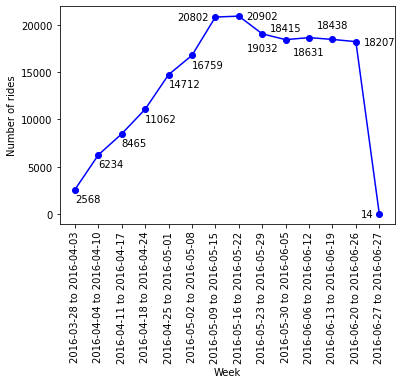

In [44]:
plt.plot('date range', 'number of rides', 'b-o', data=rides)
plt.ylabel('Number of rides')
plt.xlabel('Week')
plt.xticks(rotation=90)
for i, v in enumerate(rides['number of rides']):
    if i <= 5:
        plt.text(i, v - 1000, "%d" %v, ha = 'left', va='center')
    elif i == 6:
        plt.text(i - 0.3, v, "%d" %v, ha = 'right', va='center')
    elif i == 7:
        plt.text(i + 0.3, v, "%d" %v, ha = 'left', va='center')
    elif i == 8:
        plt.text(i, v - 1500, "%d" %v, ha='center', va='center')
    elif i == 9:
        plt.text(i, v + 1200, "%d" %v, ha='center', va='center')
    elif i == 10:
        plt.text(i, v - 1500, "%d" %v, ha='center', va='center')
    elif i == 11:
        plt.text(i, v + 1500, "%d" %v, ha='center', va='center')
    elif i == 12:
        plt.text(i + 1, v, "%d" %v, ha='center', va='center')
    elif i == 13:
        plt.text(i - 0.5, v, "%d" %v, ha='center', va='center')
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/no_rides.png', bbox_inches='tight')

# How does the demand for rides impact the number of drivers?

,drivers,rides
0,127,2568
1,261,6234
2,355,8465
3,454,11062
4,528,14712
5,617,16759
6,669,20802
7,629,20902
8,604,19032
9,594,18415


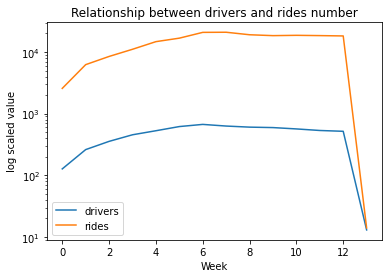

In [45]:
impact = pd.DataFrame({'drivers':active_drivers, 'rides':num})
plt.plot(impact)
plt.yscale('log')
plt.title(label='Relationship between drivers and rides number')
plt.ylabel('log scaled value')
plt.xlabel('Week')
plt.legend(['drivers', 'rides'])
impact
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/relationship.png', bbox_inches='tight')
# the figure shows that they are highly related with each other in a positive way

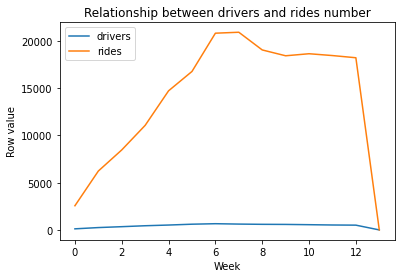

In [46]:
plt.plot(impact)
plt.title(label='Relationship between drivers and rides number')
plt.xlabel('Week')
plt.ylabel('Row value')
plt.legend(['drivers', 'rides'])
plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/relationship-v2.png')

In [47]:
# check their relationship in a mathematical way
cormat = impact.corr(method = 'pearson')
cormat = cormat.style.background_gradient(cmap='coolwarm').format(precision=2)
# dfi.export(cormat, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/cormat.png')
cormat

,drivers,rides
drivers,1.00,0.97
rides,0.97,1.00


### calculate the correlation between the prime time multiplier and the drivers

In [48]:
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0


In [49]:
ride_ids['ride_prime_time'].unique()

array([ 50,   0,  25, 100,  75, 150, 200, 250, 350, 400, 300, 500])

In [50]:
ride_ids.groupby(['ride_prime_time', 'driver_id']).count()

ride_id  ride_distance  \
ride_prime_time driver_id                                                  
0               002be0ffdc997bd5c50703158b7c2491      167            167   
                007f0389f9c7b03ef97098422f902e62       19             19   
                011e5c5dfc5c2c92501b8b24d47509bc       18             18   
                0152a2f305e71d26cc964f8d4411add9      143            143   
                01674381af7edd264113d4e6ed55ecda      276            276   
...                                                   ...            ...   
400             87b493b5ff1b807c2320801fcd16ac26        1              1   
                b6ec72d2f14dcc90a4e7fd25bd12e9a7        1              1   
                d54674169d8b98851d54d79405c5d261        1              1   
                dae249fc394c9bdf02f7d8bb1ff55733        2              2   
500             5efe1190183936849880ece11b1ece77        1              1   

                                                  ride_duration  
ride_prime_time driver_id                                        
0               002be0ffdc997bd5c50703158b7c2491            167  
                007f0389f9c7b03ef97098422f902e62             19  
                011e5c5dfc5c2c92501b8b24d47509bc             18  
                0152a2f305e71d26cc964f8d4411add9            143  
                01674381af7edd264113d4e6ed55ecda            276  
...                                                         ...  
400             87b493b5ff1b807c2320801fcd16ac26              1  
                b6ec72d2f14dcc90a4e7fd25bd12e9a7              1  
                d54674169d8b98851d54d79405c5d261              1  
                dae249fc394c9bdf02f7d8bb1ff55733              2  
500             5efe1190183936849880ece11b1ece77              1  

[5397 rows x 3 columns]

Text(0, 0.5, 'ride_id')

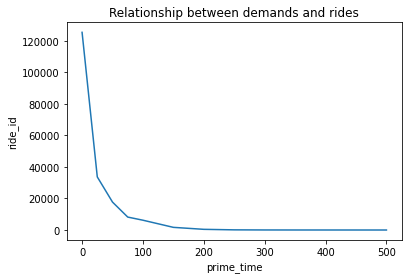

In [51]:
# this count includes all driver_ids including duplication
# calculate relationship between rides and prime_time
# len(ride_ids['ride_id'].unique()) # 193502
edit3 = ride_ids.groupby('ride_prime_time').count().reset_index()
plt.plot('ride_prime_time', 'ride_id', data=edit3)
plt.title(label='Relationship between demands and rides')
plt.xlabel('prime_time')
plt.ylabel('ride_id')
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/prime_ride.png', bbox_inches='tight')

In [52]:
# # test case
# a = ([0] * 3)
# a.extend([5]*4 )
# a
cur_lst = []
for i in range(len(edit3)):
    curr = edit3['ride_prime_time'].iloc[i]
    cnt = edit3['driver_id'].iloc[i]
    cur_lst.extend([curr] * cnt)

Fitting 1 distributions: 100%|████████████████████| 1/1 [00:00<00:00, 68.71it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.010263,3463.39859,-3.241573e+06,inf,0.648117,0.0


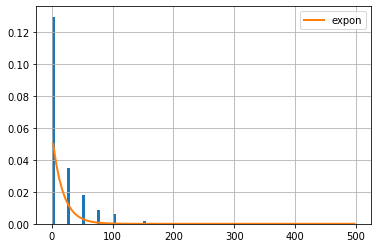

In [53]:
# check whether the distribution fits exponential distribution
f = Fitter(cur_lst, distributions='expon')
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.010263,3463.39859,-3.241573e+06,inf,0.648117,0.0


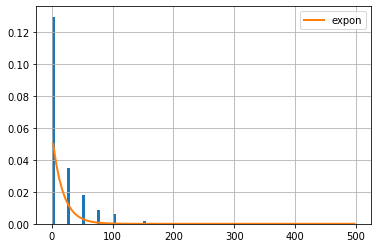

In [54]:
f.summary()
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/f.png')

In [55]:
cormat = edit3.corr(method='pearson')
cormat = cormat.style.background_gradient(cmap='coolwarm').format(precision=2)
cormat

,ride_prime_time,driver_id,ride_id,ride_distance,ride_duration
ride_prime_time,1.00,-0.56,-0.56,-0.56,-0.56
driver_id,-0.56,1.00,1.00,1.00,1.00
ride_id,-0.56,1.00,1.00,1.00,1.00
ride_distance,-0.56,1.00,1.00,1.00,1.00
ride_duration,-0.56,1.00,1.00,1.00,1.00


In [56]:
# dfi.export(cormat, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/cormat1.png')

In [57]:
# this count is unique driver_id's number
edit1 = ride_ids.groupby(['ride_prime_time', 'driver_id']).count()
edit1 = edit1.reset_index()
edit2 = edit1.groupby('ride_prime_time').count().reset_index()
edit2

,ride_prime_time,driver_id,ride_id,ride_distance,ride_duration
0,0,937,937,937,937
1,25,928,928,928,928
2,50,903,903,903,903
3,75,836,836,836,836
4,100,784,784,784,784
5,150,577,577,577,577
6,200,291,291,291,291
7,250,90,90,90,90
8,300,30,30,30,30
9,350,13,13,13,13


Text(0.5, 1.0, 'Relationship between drivers and demand')

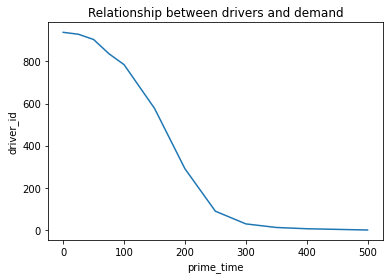

In [58]:
plt.plot('ride_prime_time', 'driver_id', data=edit2)
plt.xlabel('prime_time')
plt.ylabel('driver_id')
plt.title(label='Relationship between drivers and demand')
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/driver_prime.png')

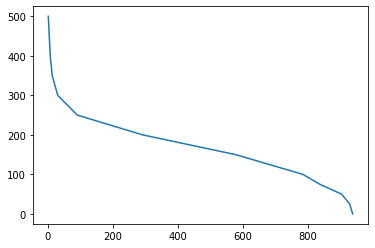

In [59]:
plt.plot('driver_id', 'ride_prime_time', data=edit2)

In [60]:
# correlation between prime time and rides
cormat = edit2.corr(method='pearson')
cormat = cormat.style.background_gradient(cmap='coolwarm').format(precision=2)
cormat
# dfi.export(cormat, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/cormat2.png')

,ride_prime_time,driver_id,ride_id,ride_distance,ride_duration
ride_prime_time,1.00,-0.94,-0.94,-0.94,-0.94
driver_id,-0.94,1.00,1.00,1.00,1.00
ride_id,-0.94,1.00,1.00,1.00,1.00
ride_distance,-0.94,1.00,1.00,1.00,1.00
ride_duration,-0.94,1.00,1.00,1.00,1.00


In [61]:
cur_lst = []
for i in range(len(edit2)):
    curr = edit2['ride_prime_time'].iloc[i]
    cnt = edit2['driver_id'].iloc[i]
    cur_lst.extend([curr] * cnt)

Fitting 1 distributions: 100%|███████████████████| 1/1 [00:00<00:00, 154.55it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.004915,2268.455401,-75050.543531,inf,0.154956,1.236179e-113


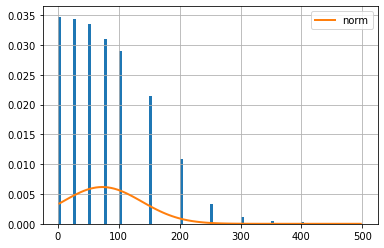

In [62]:
f1 = Fitter(cur_lst, distributions='norm')
f1.fit()
f1.summary()

In [63]:
## save the figure
# f1.summary()
# f1
# plt.savefig('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/dist-norm.png')

### use linear regression to prove the relationship

In [64]:
x = np.array(active_drivers).reshape(-1, 1)
y = np.array(num)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [65]:
r_sq = model.score(x, y)

In [66]:
r_sq

0.9460106819917389

## correlation between prime_time and drivers

In [67]:
ride_ids_v2

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45
...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04


In [68]:
ride_ids_v2['ride_prime_time'].unique()

array([ 50,   0,  25, 100,  75, 150, 200, 250, 350, 400, 300, 500])

# basic LTV

In [69]:
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0


In [70]:
ride_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [71]:
ride_ids['total'] = (2 + ride_ids['ride_distance'] * 0.000621371 * 1.15 + 0.22 * ride_ids['ride_duration'] / 60 + 1.75) * (1 + ride_ids['ride_prime_time'] / 100)
ride_ids

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,total
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,9.364647
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,78.298801
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,19.416299
...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,15.885184
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,6.745079
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,9.844508
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,10.000385


In [72]:
# # check 
# (2 + 1811 * 0.000621371 * 1.15 + 0.22 * 327 / 60 + 1.75) * (1 + 0.5)

In [73]:
# check whether the total is in the intersection
ride_ids[(ride_ids['total'] < 5) | (ride_ids['total'] > 400)]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,total
158,002be0ffdc997bd5c50703158b7c2491,8d0a92aa9a1180b9ee1960a845e2f547,953,120,0,4.870992
218,002be0ffdc997bd5c50703158b7c2491,c9ce8806998b14be09954c2f5edab205,803,117,0,4.752805
378,0152a2f305e71d26cc964f8d4411add9,24c6dece18905dc661370b86f7e1d42c,784,178,0,4.962895
413,0152a2f305e71d26cc964f8d4411add9,5e03a5f3fe26625d084af1ad8e48a3a7,404,198,0,4.764689
417,0152a2f305e71d26cc964f8d4411add9,61aa0c8ec436c57929df9ef787fc97bf,485,126,0,4.558570
...,...,...,...,...,...,...
192831,fffecccc49436c5389075b13209f0dfa,2a1c33f88d6c0aeeae08442fecec7961,1,40,0,3.897381
193044,fffecccc49436c5389075b13209f0dfa,ac328d724d381e30036df9288da0f73f,28,234,0,4.628008
193045,fffecccc49436c5389075b13209f0dfa,ac64e88ee276f31f0821b460266a9a22,535,164,0,4.733632
193135,fffecccc49436c5389075b13209f0dfa,e8fb9ebd129a5a22573867d334b47f42,112,62,0,4.057366


In [74]:
ride_ids[ride_ids['total'] < 5] = 5
ride_ids[ride_ids['total'] > 400] = 400
ride_ids[(ride_ids['total'] < 5) | (ride_ids['total'] > 400)]

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,total


## calculate average earning per driver per month / week

In [75]:
ride_ids_v2
# dfi.export(ride_ids_v2, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_ids_v2.png', max_rows=10)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45
...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04


In [76]:
ride_ids_v2['total'] = ride_ids['total']
ride_ids_v2
# temp = ride_ids_v2.transpose()
# temp = temp.iloc[:, :2]
# temp
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/ride_ids_v2.png')

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,9.364647
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,78.298801
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,19.416299
...,...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30,15.885184
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33,6.745079
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46,9.844508
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04,10.000385


In [77]:
# weeks = [g for n, g in ride_ids_v2.groupby(pd.Grouper(key='timestamp', freq='W'))]
# for i in range(len(weeks)):
#     vars()['week__' + str(i + 1)] = pd.DataFrame(weeks[0]).reset_index()
# week__1

In [78]:
# # test for week__1
# week__1.groupby('driver_id').mean()

In [79]:
drive_total = ride_ids_v2.groupby('driver_id').sum()
drive_total.reset_index(inplace=True)
drive_total
# temp = drive_total.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/drive_total.png')

,driver_id,ride_distance,ride_duration,ride_prime_time,total
0,002be0ffdc997bd5c50703158b7c2491,1740287,221238,5375,3654.984520
1,007f0389f9c7b03ef97098422f902e62,117531,20497,625,332.432167
2,011e5c5dfc5c2c92501b8b24d47509bc,269653,29205,675,494.240288
3,0152a2f305e71d26cc964f8d4411add9,1471239,174521,2050,2646.743381
4,01674381af7edd264113d4e6ed55ecda,3123644,357443,4700,5463.340771
...,...,...,...,...,...
932,ff45a18cae7bed6538847cb36e2a3975,593481,55573,375,935.660068
933,ff714a67ba8c6a108261cd81e3b77f3a,2834765,442492,8625,6438.299480
934,fff482c704d36a1afe8b8978d5486283,174394,27693,175,383.723554
935,fffecccc49436c5389075b13209f0dfa,2924913,353974,12050,6263.017374


In [80]:
weeks = [g for n, g in ride_ids_v2.groupby(pd.Grouper(key = 'timestamp', freq='W'))]
len(weeks) # 14
drive_total['avg_week'] = drive_total['total'] / 14
drive_total
# temp = drive_total.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/drive_total_v2.png')

,driver_id,ride_distance,ride_duration,ride_prime_time,total,avg_week
0,002be0ffdc997bd5c50703158b7c2491,1740287,221238,5375,3654.984520,261.070323
1,007f0389f9c7b03ef97098422f902e62,117531,20497,625,332.432167,23.745155
2,011e5c5dfc5c2c92501b8b24d47509bc,269653,29205,675,494.240288,35.302878
3,0152a2f305e71d26cc964f8d4411add9,1471239,174521,2050,2646.743381,189.053099
4,01674381af7edd264113d4e6ed55ecda,3123644,357443,4700,5463.340771,390.238626
...,...,...,...,...,...,...
932,ff45a18cae7bed6538847cb36e2a3975,593481,55573,375,935.660068,66.832862
933,ff714a67ba8c6a108261cd81e3b77f3a,2834765,442492,8625,6438.299480,459.878534
934,fff482c704d36a1afe8b8978d5486283,174394,27693,175,383.723554,27.408825
935,fffecccc49436c5389075b13209f0dfa,2924913,353974,12050,6263.017374,447.358384


In [81]:
months = [g for n, g in ride_ids_v2.groupby(pd.Grouper(key='timestamp', freq='M'))]
len(months) # 4
drive_total['avg_month'] = drive_total['total'] / 4
drive_total
# temp = drive_total.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/drive_total_v3.png')

,driver_id,ride_distance,ride_duration,ride_prime_time,total,avg_week,avg_month
0,002be0ffdc997bd5c50703158b7c2491,1740287,221238,5375,3654.984520,261.070323,913.746130
1,007f0389f9c7b03ef97098422f902e62,117531,20497,625,332.432167,23.745155,83.108042
2,011e5c5dfc5c2c92501b8b24d47509bc,269653,29205,675,494.240288,35.302878,123.560072
3,0152a2f305e71d26cc964f8d4411add9,1471239,174521,2050,2646.743381,189.053099,661.685845
4,01674381af7edd264113d4e6ed55ecda,3123644,357443,4700,5463.340771,390.238626,1365.835193
...,...,...,...,...,...,...,...
932,ff45a18cae7bed6538847cb36e2a3975,593481,55573,375,935.660068,66.832862,233.915017
933,ff714a67ba8c6a108261cd81e3b77f3a,2834765,442492,8625,6438.299480,459.878534,1609.574870
934,fff482c704d36a1afe8b8978d5486283,174394,27693,175,383.723554,27.408825,95.930888
935,fffecccc49436c5389075b13209f0dfa,2924913,353974,12050,6263.017374,447.358384,1565.754344


In [82]:
# I assume the car company collects 20% per month from each driver
sum(drive_total['avg_month'])/937 * 0.2 # 937 different drivers 0.2 for the company

142.8977507527659

## calculate the churn rate

In [83]:
for i in range(len(months)):
    vars()['month_'+str(i + 1)] = pd.DataFrame(months[i])
len(month_1['driver_id'].unique()) # 96
month_1

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
184739,f0df79d10df44f18742682108b17f60a,655ccbeb2a62880159e20e986c1cdaeb,40812,2112,25,requested_at,2016-03-28 06:37:51,50.821628
192682,ff714a67ba8c6a108261cd81e3b77f3a,e81c8bdc2a6a9056ba49bf67bf97c311,9384,1653,0,requested_at,2016-03-28 08:41:46,16.516587
192639,ff714a67ba8c6a108261cd81e3b77f3a,d113a5d0e13f2ddd041806aa5b1d90c8,22779,1953,0,requested_at,2016-03-28 09:20:46,27.188342
114807,8eb2f1fd0858319b86b9e44b64660eb6,e8564242d0aec402e965befa8529ed62,22748,2049,0,requested_at,2016-03-28 09:28:45,27.518190
103991,7f4350f4a358ac264ccf3b10c4966afc,c5f5ce67e46d268585c5c0fa0cdee78d,3602,571,25,requested_at,2016-03-28 09:34:21,10.521965
...,...,...,...,...,...,...,...,...
152458,c12c2eb875879488e687111335a12805,1faef90f439588bafb3405684d6c7bf9,37641,2042,0,requested_at,2016-03-31 23:42:11,38.134713
150712,bd9366761825d97d4c79c2c61638318b,8309a2814659e7e227c8b19752ef0d2c,2243,567,0,requested_at,2016-03-31 23:48:06,7.431795
106751,8224c23bca05c2adb3fdf40752eb1b3c,5c5340904f6df5b9fa96be1d1791667b,23157,1640,0,requested_at,2016-03-31 23:50:41,26.310785
170467,ddf9fad53fff9a2f2ded181e1144b47f,d3a4619792347d3d31fc34e167918f7f,11614,1171,0,requested_at,2016-03-31 23:52:13,16.342760


In [84]:
## save month_1
# temp = month_1.transpose()
# temp = temp.iloc[:, :2]
# # dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/month_1.png')

In [85]:
# ## save month_2
# temp = month_2.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/month_2.png')

In [86]:
# ## save month_3
# temp = month_3.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/month_3.png')

In [87]:
# ## save month_4
# temp = month_4.transpose()
# temp = temp.iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/month_4.png')

In [88]:
churn_rate = []
len(month_1['driver_id'].unique())

96

In [89]:
common12 = set(list(month_1['driver_id'])).intersection(list(month_2['driver_id']))
len(common12) # 90 intersection in common between month 1 and 2
rate12 = 100 - len(common12) / len(set(month_1['driver_id'])) * 100 # the percentage of churn rate
churn_rate.append(rate12)
rate12 # March/April

6.25

In [90]:
len(month_2) # 

37116

In [91]:
len(month_3)

79153

In [92]:
common23 = set(list(month_2['driver_id'])).intersection(list(month_3['driver_id']))
len(common23) # 566
rate23 = 100 - len(common23) / len(set(month_2['driver_id'])) * 100
churn_rate.append(rate23)
rate23 # April/May

9.149277688603533

In [93]:
common34 = set(list(month_3['driver_id'])).intersection(list(month_4['driver_id']))
len(common34) # 663
rate34 = 100 - len(common34) / len(set(month_3['driver_id'])) * 100
churn_rate.append(rate34)
rate34 # May/June

15.217391304347828

In [94]:
# use the mean of churn rate of four months as churn rate
statistics.mean(churn_rate)

10.205556330983788

In [95]:
# monthly churn at 10.21% puts the average lifetime at 10 months (1/.1021 = 10)
(1 / 0.10205556330983788)

9.798583904377928

In [96]:
# so the LTV:
print("The LTV of each driver is {0:.2f}$".format(143 * 10))

The LTV of each driver is 1430.00$


# the average projected lifetime of a driver

In [97]:
driver_ids

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26 00:00:00
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28 00:00:00
934,fff482c704d36a1afe8b8978d5486283,2016-04-08 00:00:00
935,fffecccc49436c5389075b13209f0dfa,2016-05-06 00:00:00


In [98]:
# a = driver_ids['driver_onboard_date'].astype(object)
# a[0].month

driver_ids['driver_onboard_date'] = pd.to_datetime(driver_ids['driver_onboard_date'])
temp = driver_ids[driver_ids['driver_onboard_date'].dt.strftime("%m") == '03']
temp['driver_onboard_date'].dt.strftime("%d").unique()

array(['29', '31', '30', '28'], dtype=object)

In [99]:
ride_ids_v2

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,9.364647
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,78.298801
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,19.416299
...,...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30,15.885184
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33,6.745079
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46,9.844508
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04,10.000385


In [100]:
# check whether there's any duplications
len(driver_ids['driver_id'].unique())

937

In [101]:
# find unique month in driver_ids data
driver_ids['driver_onboard_date'] = pd.to_datetime(driver_ids['driver_onboard_date'])
driver_ids['driver_onboard_date'].dt.strftime("%m/%y").unique().tolist()

['03/16', '04/16', '05/16']

In [102]:
# unique month in months data
ride_ids_v2['timestamp'].dt.strftime("%m/%y").unique().tolist()

['04/16', '03/16', '06/16', '05/16', nan]

In [103]:
month_driver = [g for n, g in driver_ids.groupby(pd.Grouper(key='driver_onboard_date', freq='M'))]
for i in range(len(month_driver)):
    vars()['month_driver_' + str(i + 1)] = pd.DataFrame(month_driver[i])

In [104]:
common_driver1 = set(month_driver_1['driver_id']).intersection(set(month_1['driver_id']))
len(common_driver1) # 96 common driver in March
len(month_driver_1) # 107 drivers on board in march
# check whether there's any driver in month_1 but not in month_driver_1:
cnt = 0
for i in month_1['driver_id'].unique():
    if i not in month_driver_1['driver_id'].unique():
        cnt += 1
cnt # 0

0

In [105]:
not_common_march = month_driver_1[~month_driver_1['driver_id'].isin(list(common_driver1))].copy().reset_index()
not_common_march['leave_March'] = True
not_common_march.drop(columns='index', inplace=True)
not_common_march
# these are all at the end of March, so not appear in month_1 makes sense

,driver_id,driver_onboard_date,leave_March
0,1e9b964b3e3d0289794289579269247a,2016-03-28,True
1,956942174fc793c4bfb6fffc4b3c1c7b,2016-03-28,True
2,7c27405cefee2fad79a81a819ca9dbe1,2016-03-29,True
3,9c5a3250d9f6e6537b3b076b26ce16cb,2016-03-29,True
4,4856b892095f3afe8607a5ba0121b7b8,2016-03-30,True
5,74279b827e47bbddb5ba57863c174995,2016-03-30,True
6,339a64370e18200c78fa15487f688c74,2016-03-31,True
7,794a74f41f18a115252fd26bbd16882b,2016-03-31,True
8,94d5f7697a40886a8723f6015fe47841,2016-03-31,True
9,d54674169d8b98851d54d79405c5d261,2016-03-31,True


In [106]:
# driver_ids_v2 = driver_ids.copy()
# driver_ids_v2 = driver_ids_v2.merge(not_common_march, on=['driver_id', 'driver_onboard_date'], how='left')
# driver_ids_v2

In [107]:
month_2

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
170458,ddf9fad53fff9a2f2ded181e1144b47f,a0af1a46129a57162cc0292eef7a5139,10473,926,0,requested_at,2016-04-01 00:09:43,14.629095
60855,4d1e99b879de5fa11e3f5423416f0497,6dfa817b5ec01a1050328797095824f8,8151,1596,0,requested_at,2016-04-01 00:10:20,15.426514
89697,6c9d732cd0560af6e8939ac97bdd78d2,01380a4ad3b51c8ef791cdbf25bb48ac,5774,983,0,requested_at,2016-04-01 00:16:40,11.480299
162474,d0f374c7d36c93ba0772626d4c4e6f7a,5d81a42971402c8eeee0ca20b7146b33,4194,544,0,requested_at,2016-04-01 00:17:19,8.741601
170465,ddf9fad53fff9a2f2ded181e1144b47f,cae30ef134a1045d037c635c99c99641,1334,196,0,requested_at,2016-04-01 00:18:13,5.421912
...,...,...,...,...,...,...,...,...
139869,af74473d8f38c0c3e8cba5b72f747281,d6ded8ff6a38985c7bef3f191b771ec1,1280,169,25,requested_at,2016-04-30 23:58:32,6.605406
43786,392e07cd00f38f357ae73795619fd0e3,274b01dc34d6e2fb3d63f79b7579b2eb,1871,397,0,requested_at,2016-04-30 23:59:06,6.542640
150095,bd2cf0eb59f96babbb13b724d8d77b12,e2a330c6ef00e33c42c3c29fd2daba96,59655,2408,25,requested_at,2016-04-30 23:59:10,69.009254
174113,e1970a13e4fbb03fee21f66f7a97f5eb,12d053e08d9813988451f0b5f6b4d24f,1035,343,0,requested_at,2016-04-30 23:59:48,5.747253


In [108]:
common_driver2 = set(month_driver_1['driver_id']).intersection(set(month_2['driver_id']))
len(common_driver2) # 94 common driver in April and on board in March
# check whether there's any driver in month_2 but not in month_driver_1:
# cnt = 0
# for i in month_2['driver_id'].unique():
#     if i not in month_driver_1['driver_id'].unique():
#         cnt += 1
# cnt # 529

94

In [109]:
not_common_april = month_driver_1[~month_driver_1['driver_id'].isin(list(common_driver2))].copy().reset_index()
not_common_april['leave_april'] = True
not_common_april.drop(columns='index', inplace=True)
not_common_april

,driver_id,driver_onboard_date,leave_april
0,1e9b964b3e3d0289794289579269247a,2016-03-28,True
1,7f4350f4a358ac264ccf3b10c4966afc,2016-03-28,True
2,e4f3a9d5cf57b9b518136afd9757f76d,2016-03-28,True
3,6eb2e0f41fc9f1fbb70e7751035fdf87,2016-03-29,True
4,bd057e02f75c92917389d90bb215fe91,2016-03-29,True
5,4856b892095f3afe8607a5ba0121b7b8,2016-03-30,True
6,68b546b2f4102641d6774c1ce4f57457,2016-03-30,True
7,74279b827e47bbddb5ba57863c174995,2016-03-30,True
8,9d59581a50c97cf28d30f80cc77dd76c,2016-03-30,True
9,339a64370e18200c78fa15487f688c74,2016-03-31,True


In [110]:
driver_ids_v2 = driver_ids.copy()
driver_ids_v2 = driver_ids_v2.merge(not_common_april, on=['driver_id', 'driver_onboard_date'], how='left')
leave_april = driver_ids_v2.copy()
leave_april

,driver_id,driver_onboard_date,leave_april
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,NaN
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,NaN
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,NaN
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,NaN
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,NaN
...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26,NaN
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,NaN
934,fff482c704d36a1afe8b8978d5486283,2016-04-08,NaN
935,fffecccc49436c5389075b13209f0dfa,2016-05-06,NaN


In [111]:
# temp = leave_april.transpose().iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/leave_april.png')

In [112]:
lst1 = list(not_common_march['driver_onboard_date'])
lst2 = list(not_common_april['driver_onboard_date'])
set(lst1).intersection(lst2)

{Timestamp('2016-03-28 00:00:00'),
 Timestamp('2016-03-29 00:00:00'),
 Timestamp('2016-03-30 00:00:00'),
 Timestamp('2016-03-31 00:00:00')}

In [113]:
common_driver3 = set(month_driver_1['driver_id']).intersection(month_3['driver_id'])
len(common_driver3) # 75
not_common_may = month_driver_1[~month_driver_1['driver_id'].isin(list(common_driver3))].copy().reset_index()
not_common_may['leave_may'] = True
not_common_may.drop(columns='index', inplace=True)
not_common_may
leave_may = not_common_may.copy()
leave_may

,driver_id,driver_onboard_date,leave_may
0,1e9b964b3e3d0289794289579269247a,2016-03-28,True
1,7f4350f4a358ac264ccf3b10c4966afc,2016-03-28,True
2,895c14bfd7d1e2c26aee6938703f32f8,2016-03-28,True
3,e1d2df8059744cac678fbdc113e9e697,2016-03-28,True
4,e4f3a9d5cf57b9b518136afd9757f76d,2016-03-28,True
5,f1b4411717c78f67380366c2a16a4d1e,2016-03-28,True
6,f86eb77e1cefe28e9f0e9d3775fae261,2016-03-28,True
7,faebff3d5429ff2036c125a91df765c8,2016-03-28,True
8,0eff1404b137a5562642f0f706e59f25,2016-03-29,True
9,173a168d2b8830525f59be85a35f0000,2016-03-29,True


In [114]:
# temp = leave_may.transpose().iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/leave_may.png')

In [115]:
driver_ids_v2 = driver_ids_v2.merge(not_common_may, on=['driver_id', 'driver_onboard_date'], how='left')
driver_ids_v2

,driver_id,driver_onboard_date,leave_april,leave_may
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,NaN,NaN
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,NaN,NaN
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,NaN,NaN
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,NaN,NaN
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,NaN,NaN
...,...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26,NaN,NaN
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,NaN,NaN
934,fff482c704d36a1afe8b8978d5486283,2016-04-08,NaN,NaN
935,fffecccc49436c5389075b13209f0dfa,2016-05-06,NaN,NaN


In [116]:
common_driver4 = set(month_driver_1['driver_id']).intersection(month_4['driver_id'])
len(common_driver4) # 75
not_common_june = month_driver_1[~month_driver_1['driver_id'].isin(list(common_driver4))].copy().reset_index()
not_common_june['leave_june'] = True
not_common_june.drop(columns='index', inplace=True)
not_common_june

,driver_id,driver_onboard_date,leave_june
0,1e9b964b3e3d0289794289579269247a,2016-03-28,True
1,895c14bfd7d1e2c26aee6938703f32f8,2016-03-28,True
2,e1d2df8059744cac678fbdc113e9e697,2016-03-28,True
3,e4f3a9d5cf57b9b518136afd9757f76d,2016-03-28,True
4,f1b4411717c78f67380366c2a16a4d1e,2016-03-28,True
5,faebff3d5429ff2036c125a91df765c8,2016-03-28,True
6,0eff1404b137a5562642f0f706e59f25,2016-03-29,True
7,173a168d2b8830525f59be85a35f0000,2016-03-29,True
8,55d7b17732745057aff29fcd0ce13014,2016-03-29,True
9,579967d1572ee95c66ffa1ca4077b61a,2016-03-29,True


In [117]:
# leave_june = not_common_june.copy()
# temp = leave_june.copy()
# temp = temp.transpose().iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/leave_june.png')

In [118]:
driver_ids_v2 = driver_ids_v2.merge(not_common_june, on=['driver_id', 'driver_onboard_date'], how='left')
driver_ids_v2

,driver_id,driver_onboard_date,leave_april,leave_may,leave_june
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,NaN,NaN,NaN
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,NaN,NaN,NaN
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,NaN,NaN,NaN
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,NaN,NaN,NaN
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,NaN,NaN,NaN
...,...,...,...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26,NaN,NaN,NaN
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28,NaN,NaN,NaN
934,fff482c704d36a1afe8b8978d5486283,2016-04-08,NaN,NaN,NaN
935,fffecccc49436c5389075b13209f0dfa,2016-05-06,NaN,NaN,NaN


In [119]:
check = driver_ids_v2[driver_ids_v2['leave_june'] == True].copy()
check.reset_index(inplace=True)
check.drop(columns='index', inplace=True)
check['leave_month'] = np.NaN
for i in range(len(check)):
#     if check.loc[i, 'leave_March'] == True:
#         check.loc[i, 'leave_month'] = 0
    if check.loc[i, 'leave_april'] == True:
        check.loc[i, 'leave_month'] = 1
    elif check.loc[i, 'leave_may'] == True:
        check.loc[i, 'leave_month'] = 2
    elif check.loc[i, 'leave_june'] == True:
        check.loc[i, 'leave_month'] = 3
check

,driver_id,driver_onboard_date,leave_april,leave_may,leave_june,leave_month
0,02e440f6c209206375833cef02e0cbae,2016-03-31,NaN,NaN,True,3.0
1,0eff1404b137a5562642f0f706e59f25,2016-03-29,NaN,True,True,2.0
2,1110d496149d3d8c50276765924df831,2016-03-31,NaN,True,True,2.0
3,173a168d2b8830525f59be85a35f0000,2016-03-29,NaN,True,True,2.0
4,1e9b964b3e3d0289794289579269247a,2016-03-28,True,True,True,1.0
5,339a64370e18200c78fa15487f688c74,2016-03-31,True,True,True,1.0
6,4856b892095f3afe8607a5ba0121b7b8,2016-03-30,True,True,True,1.0
7,4d1e99b879de5fa11e3f5423416f0497,2016-03-31,NaN,NaN,True,3.0
8,55d7b17732745057aff29fcd0ce13014,2016-03-29,NaN,True,True,2.0
9,579967d1572ee95c66ffa1ca4077b61a,2016-03-29,NaN,True,True,2.0


In [120]:
# temp = check.copy()
# temp = temp.transpose().iloc[:, :2]
# dfi.export(temp, '/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/check.png')

In [121]:
check.groupby('leave_month').count()
# 7 drivers leave within one month
# 4 drivers leave within two month
# 19 drivers leave within three month
# 6 drivers leave within four month

,driver_id,driver_onboard_date,leave_april,leave_may,leave_june
leave_month,,,,,
1.0,11,11,11,11,11
2.0,19,19,0,19,19
3.0,6,6,0,0,6


In [122]:
len(month_driver_1)

107

In [123]:
11 / 107 # churn rate

0.102803738317757

In [124]:
19 / (107 - 11)

0.19791666666666666

In [125]:
6 / (107-11-19)

0.07792207792207792

In [126]:
# 6 / (107-7-4-19)

In [127]:
print("avg percentage of the churn rate is {0:.2f}% per month".format((0.102803738317757 + 0.19791666666666666 + 0.07792207792207792) / 3 * 100))
# I haven't count the drivers joined per month, so the above number is inaccurate

avg percentage of the churn rate is 12.62% per month


In [128]:
# (0.06542056074766354 + 0.04 + 0.19791666666666666 + 0.07792207792207792) / 4

## % of Active Drivers over time

In [129]:
ride_ts

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05
...,...,...,...
970400,ffffccd77f47a3de26dfed9a851464b4,requested_at,2016-05-18 08:44:13
970401,ffffccd77f47a3de26dfed9a851464b4,accepted_at,2016-05-18 08:44:21
970402,ffffccd77f47a3de26dfed9a851464b4,arrived_at,2016-05-18 08:44:36
970403,ffffccd77f47a3de26dfed9a851464b4,picked_up_at,2016-05-18 08:44:42


In [130]:
driver_ids

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23
4,01674381af7edd264113d4e6ed55ecda,2016-04-29
...,...,...
932,ff419a3476e21e269e340b5f1f05414e,2016-04-26
933,ff714a67ba8c6a108261cd81e3b77f3a,2016-03-28
934,fff482c704d36a1afe8b8978d5486283,2016-04-08
935,fffecccc49436c5389075b13209f0dfa,2016-05-06


In [131]:
ride_ids_v2.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,9.364647
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,9.118740
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,8.192574
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,78.298801
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,19.416299


## try to use model find out the main factors that affect a driver's lifetime value

In [132]:
ride_ids_v3 = ride_ids_v2.copy()
ride_ids_v3['total'] = ride_ids_v3['total'] * 0.2
ride_ids_v3.head() # total is the LTV value for each driver

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,1.872929
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,1.823748
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,1.638515
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,15.659760
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,3.883260


In [133]:
combined = ride_ids_v3.merge(check, on='driver_id', how='left')
combined.drop(['driver_onboard_date', 'leave_april', 'leave_may', 'leave_june'], axis=1, inplace=True)
combined.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total,leave_month
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,1.872929,NaN
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,1.823748,NaN
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,1.638515,NaN
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,15.659760,NaN
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,3.883260,NaN


In [134]:
combined = combined.merge(driver_ids_v2, on='driver_id', how='left')
combined

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,total,leave_month,driver_onboard_date,leave_april,leave_may,leave_june
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,requested_at,2016-04-23 02:22:07,1.872929,NaN,2016-03-29,NaN,NaN,NaN
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,requested_at,2016-03-29 19:17:30,1.823748,NaN,2016-03-29,NaN,NaN,NaN
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,requested_at,2016-06-21 12:11:07,1.638515,NaN,2016-03-29,NaN,NaN,NaN
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,requested_at,2016-05-19 10:13:58,15.659760,NaN,2016-03-29,NaN,NaN,NaN
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,requested_at,2016-04-20 22:20:45,3.883260,NaN,2016-03-29,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193497,ffff51a71f2f185ec5e97d59dbcd7a78,fc717192b3512767269ff5a54b97af05,10127,1336,0,requested_at,2016-06-18 01:43:30,3.177037,NaN,2016-05-04,NaN,NaN,NaN
193498,ffff51a71f2f185ec5e97d59dbcd7a78,fd6fa5f9265d2cf83936ead663f9e0e7,1908,445,0,requested_at,2016-06-24 00:06:33,1.349016,NaN,2016-05-04,NaN,NaN,NaN
193499,ffff51a71f2f185ec5e97d59dbcd7a78,fe0857c43025264d337dfe1d8463e503,4039,875,0,requested_at,2016-05-31 19:43:46,1.968902,NaN,2016-05-04,NaN,NaN,NaN
193500,ffff51a71f2f185ec5e97d59dbcd7a78,ff0db0ca4557bf5b05b4da6f660a1ac1,4760,777,0,requested_at,2016-05-15 01:05:04,2.000077,NaN,2016-05-04,NaN,NaN,NaN


In [135]:
combined.drop(['driver_id', 'ride_id', 'event', 'timestamp', 'leave_april', 'leave_may', 'leave_june'], axis=1, inplace=True)
combined

,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
0,1811,327,50,1.872929,NaN,2016-03-29
1,3362,809,0,1.823748,NaN,2016-03-29
2,3282,572,0,1.638515,NaN,2016-03-29
3,65283,3338,25,15.659760,NaN,2016-03-29
4,4115,823,100,3.883260,NaN,2016-03-29
...,...,...,...,...,...,...
193497,10127,1336,0,3.177037,NaN,2016-05-04
193498,1908,445,0,1.349016,NaN,2016-05-04
193499,4039,875,0,1.968902,NaN,2016-05-04
193500,4760,777,0,2.000077,NaN,2016-05-04


In [136]:
combined.loc[:, 'leave_month'] = LabelEncoder().fit_transform(combined['leave_month'])
combined

,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
0,1811,327,50,1.872929,3,2016-03-29
1,3362,809,0,1.823748,3,2016-03-29
2,3282,572,0,1.638515,3,2016-03-29
3,65283,3338,25,15.659760,3,2016-03-29
4,4115,823,100,3.883260,3,2016-03-29
...,...,...,...,...,...,...
193497,10127,1336,0,3.177037,3,2016-05-04
193498,1908,445,0,1.349016,3,2016-05-04
193499,4039,875,0,1.968902,3,2016-05-04
193500,4760,777,0,2.000077,3,2016-05-04


In [137]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193502 entries, 0 to 193501
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ride_distance        193502 non-null  int64         
 1   ride_duration        193502 non-null  int64         
 2   ride_prime_time      193502 non-null  int64         
 3   total                193502 non-null  float64       
 4   leave_month          193502 non-null  int64         
 5   driver_onboard_date  185891 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.3 MB


In [138]:
combined.loc[:, 'driver_onboard_date'] = OrdinalEncoder().fit_transform(combined[['driver_onboard_date']])
combined

,ride_distance,ride_duration,ride_prime_time,total,leave_month,driver_onboard_date
0,1811,327,50,1.872929,3,1.0
1,3362,809,0,1.823748,3,1.0
2,3282,572,0,1.638515,3,1.0
3,65283,3338,25,15.659760,3,1.0
4,4115,823,100,3.883260,3,1.0
...,...,...,...,...,...,...
193497,10127,1336,0,3.177037,3,37.0
193498,1908,445,0,1.349016,3,37.0
193499,4039,875,0,1.968902,3,37.0
193500,4760,777,0,2.000077,3,37.0


In [139]:
# combined.to_csv('/Users/jennyhuang/Documents/jobs/DBC-AI-Launch/project3-LTV/combined.csv')

In [140]:
toc = time.time()
print("total time duration is {0:.2f}min".format((toc - tic) / 60))

total time duration is 0.17min
